In [1]:
import os, sys
import tqdm
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import pickle
import torch
from src.visualization import plot_action
from src.preprocess_data import preprocess_data

In [3]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import time


# this is very useful as it makes sure that always all columns and rows of a data frame are printed
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# datatools Animator
from datatools.metrica_helper import MetricaHelper
from datatools.trace_animator import TraceAnimator
from datatools.trace_helper import TraceHelper
import datatools.matplotsoccer as mps
from matplotlib import animation

In [4]:
import ast 

import pandas as pd

match_id = 1
event = pd.read_csv(f'../data/preprocess-data/event-data/match{match_id}.csv')
trace = pd.read_csv(f'../data/preprocess-data/tracking-data/match{match_id}.csv')

In [5]:
event.head()

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,start_x,start_y,end_x,end_y,phase
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,B19,NaN,NaN,NaN,NaN,NaN,1
1,Away,PASS,PASS,1,1,0.04,3,0.12,B19,B21,48.6,28.08,59.40,30.96,1
2,Away,PASS,PASS,1,3,0.12,17,0.68,B21,B15,59.4,30.96,62.64,15.12,1
3,Away,PASS,PASS,1,45,1.80,61,2.44,B15,B19,59.4,13.68,48.60,22.32,1
4,Away,PASS,PASS,1,77,3.08,96,3.84,B19,B21,48.6,23.04,52.92,33.84,1


In [12]:
event_id = 1
start_frame = event.at[event_id,'start_frame']
end_frame = event.at[event_id,'end_frame']
traces = trace[start_frame-100 : end_frame+100]

animator = TraceAnimator(
    trace_dict={"main": traces},
    show_episodes=True,
    show_events=True,
)
anim = animator.run()

t0 = traces["time"].iloc[0]
t1 = traces["time"].iloc[-1]
t0_str = f"{int(t0 // 60):02d}.{int(t0 % 60):02d}"
t1_str = f"{int(t1 // 60):02d}.{int(t1 % 60):02d}"

path = f"./{match_id}_{t0_str}-{t1_str}.mp4"
writer = animation.FFMpegWriter(fps=10)
anim.save(path, writer=writer)

/home/toc3/anaconda3/envs/py3_11/lib/python3.11/site-packages/matplotlib/text.py:1189: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.set_x(xy[0])
/home/toc3/anaconda3/envs/py3_11/lib/python3.11/site-packages/matplotlib/text.py:1190: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.set_y(xy[1])
/home/toc3/anaconda3/envs/py3_11/lib/python3.11/site-packages/matplotlib/text.py:1189: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s

['A11_x', 'A11_y', 'A01_x', 'A01_y', 'A02_x', 'A02_y', 'A03_x', 'A03_y', 'A04_x', 'A04_y', 'A05_x', 'A05_y', 'A06_x', 'A06_y', 'A07_x', 'A07_y', 'A08_x', 'A08_y', 'A09_x', 'A09_y', 'A10_x', 'A10_y', 'B25_x', 'B25_y', 'B15_x', 'B15_y', 'B16_x', 'B16_y', 'B17_x', 'B17_y', 'B18_x', 'B18_y', 'B19_x', 'B19_y', 'B20_x', 'B20_y', 'B21_x', 'B21_y', 'B22_x', 'B22_y', 'B23_x', 'B23_y', 'B24_x', 'B24_y', 'ball_x', 'ball_y']
['A11_x', 'A01_x', 'A02_x', 'A03_x', 'A04_x', 'A05_x', 'A06_x', 'A07_x', 'A08_x', 'A09_x', 'A10_x', 'B25_x', 'B15_x', 'B16_x', 'B17_x', 'B18_x', 'B19_x', 'B20_x', 'B21_x', 'B22_x', 'B23_x', 'B24_x', 'ball_x']
['A11_y', 'A01_y', 'A02_y', 'A03_y', 'A04_y', 'A05_y', 'A06_y', 'A07_y', 'A08_y', 'A09_y', 'A10_y', 'B25_y', 'B15_y', 'B16_y', 'B17_y', 'B18_y', 'B19_y', 'B20_y', 'B21_y', 'B22_y', 'B23_y', 'B24_y', 'ball_y']


NameError: name 'ss' is not defined

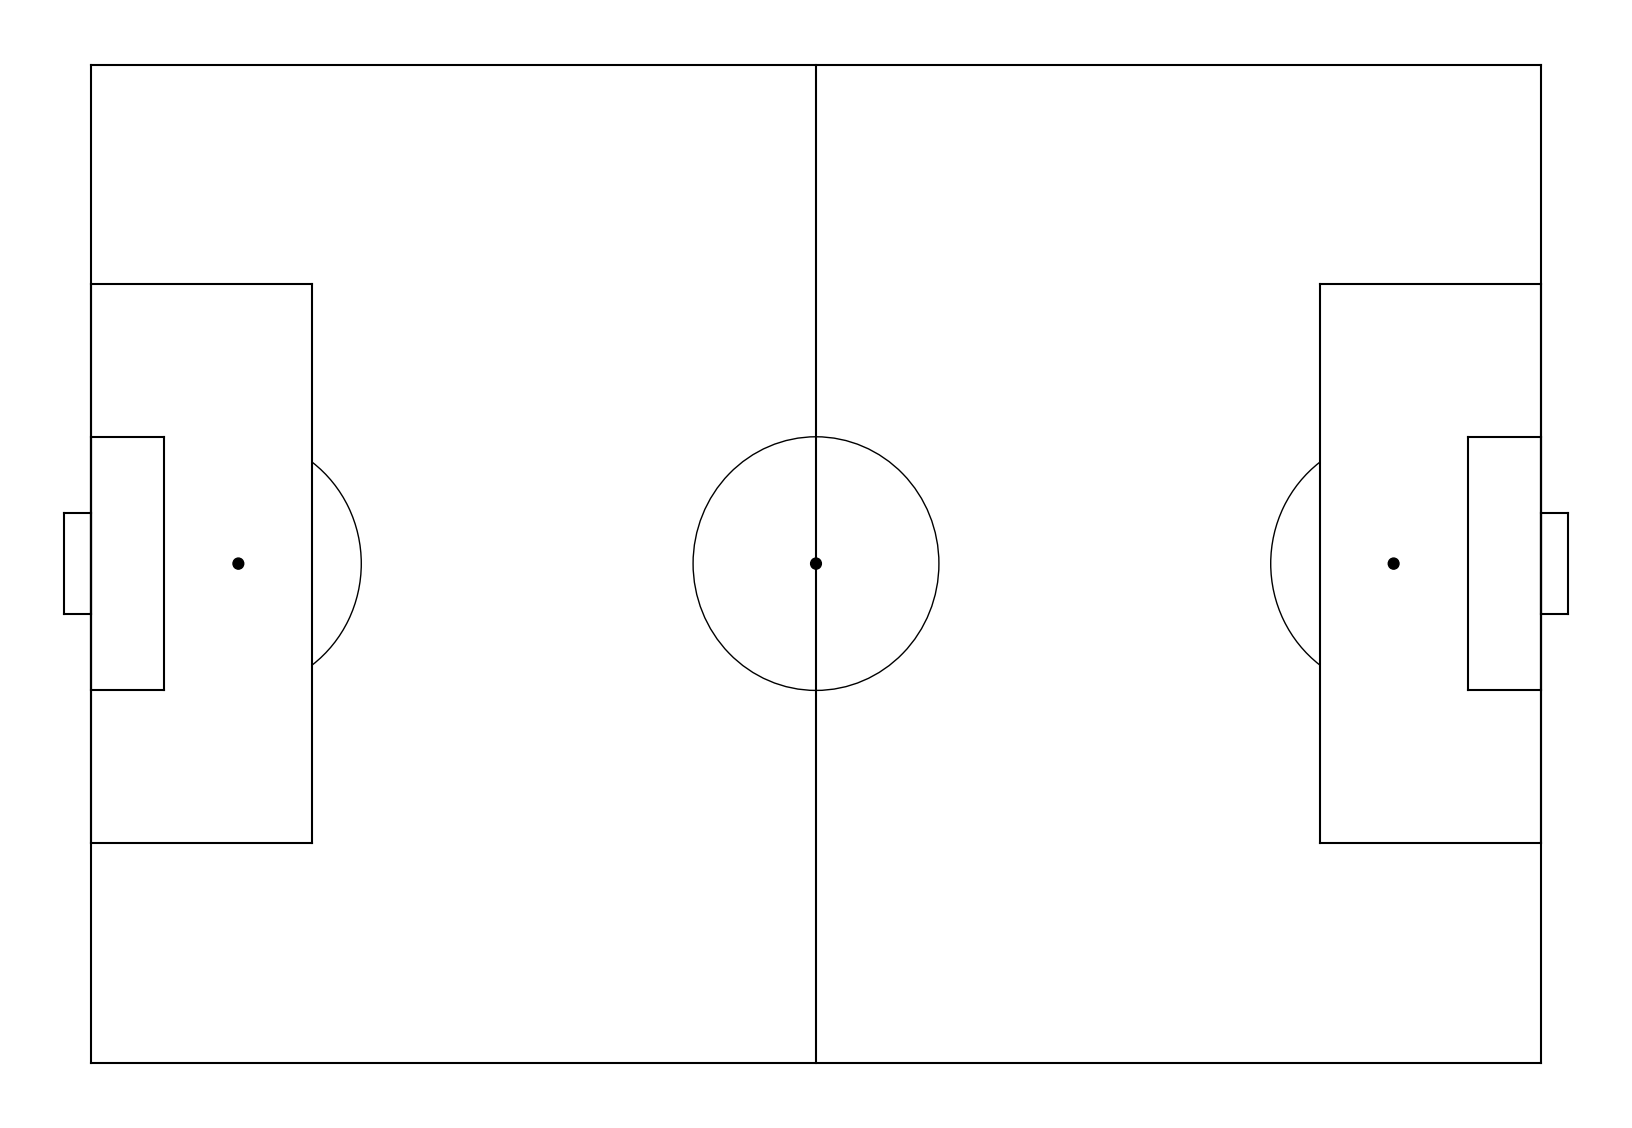

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

match_list = ['match1', 'match2', 'match3']
all_events = pd.read_csv('../metrica-data/EPV-data/all-match.csv')

for match in match_list:
    track = pd.read_csv(f'../metrica-data/tracking-data/{match}.csv')
    track.set_index('frame',inplace=True)

    game_id = int(match[-1])
    event = all_events[(all_events['game_id'] == game_id) & (all_events['type'] == 'BALL LOST')]
    #event = all_events[(all_events['type'] == 'BALL LOST') & (all_events['subtype'] == 'INTERCEPTION')]
    for _, row in event.iterrows():
        pass_id = row['pass_id']

        if pass_id != 2335:
            continue

        session_id = row['session']
        start_frame = row['start_frame']
        end_frame = row['end_frame']

        session_traces = track[track['session'] == session_id]

        frame_traces = session_traces.loc[start_frame - 30 : end_frame + 30].reset_index()
        #animation은 t가 0부터시작하기 때문에, tracking-data의 frame, time정보를 활용할 수 없음 -> 따로 time_index제작함
        highlight_time = frame_traces[(frame_traces['frame'] >= start_frame) & (frame_traces['frame'] <= end_frame)].index.to_list()

        animator = TraceAnimator(
            trace_dict={"main": frame_traces},
            highlight_time = highlight_time,
            show_episodes=True,
            show_events=True,
            play_speed=1,
            rotate_pitch=True
        )
        
        anim = animator.run()
        anim_file = f'./BALL-LOST animation/{pass_id}.mp4'
        writer = animation.FFMpegWriter(fps=10)
        anim.save(anim_file, writer=writer)

        print(row)

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

match_list = ['match1', 'match2', 'match3']
all_events = pd.read_csv('../metrica-data/EPV-data/all-match.csv')

for match in match_list:
    track = pd.read_csv(f'../metrica-data/tracking-data/{match}.csv')
    track.set_index('frame',inplace=True)

    game_id = int(match[-1])
    # event = all_events[(all_events['game_id'] == game_id) & (all_events['eventName'] == 'Pass')]
    event = all_events[(all_events['game_id'] == game_id)]
    for _, row in event.iterrows():


        pass_id = row['pass_id']
        if pass_id != 7257:
            continue
        session_id = row['session']
        start_frame = row['start_frame']
        end_frame = row['end_frame']

        session_traces = track[track['session'] == session_id]

        frame_traces = session_traces.loc[start_frame - 30 : end_frame + 30].reset_index()
        #animation은 t가 0부터시작하기 때문에, tracking-data의 frame, time정보를 활용할 수 없음 -> 따로 time_index제작함
        highlight_time = frame_traces[(frame_traces['frame'] >= start_frame) & (frame_traces['frame'] <= end_frame)].index.to_list()

        animator = TraceAnimator(
            trace_dict={"main": frame_traces},
            highlight_time = highlight_time,
            show_episodes=True,
            show_events=True,
            play_speed=1,
        )
        
        anim = animator.run()
        anim_file = f'./pass-animation/expetion{pass_id}.mp4'
        writer = animation.FFMpegWriter(fps=10)
        anim.save(anim_file, writer=writer)

        print(row)

team                                                              Home
type                                                          RECOVERY
subtype                                                       RECOVERY
session                                                              2
start_frame                                                      56795
start_time                                                      5679.5
end_frame                                                        56795
end_time                                                        5679.5
from                                                               B32
to                                                                 NaN
start_x                                                        0.25845
start_y                                                        0.34171
end_x                                                              NaN
end_y                                                              NaN
phase 